In [1]:
import odrive
from odrive.enums import *
import time, sys
import math
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from tqdm import tnrange

# Find a connected ODrive (this will block until you connect one)
print("finding an odrive...")
my_drive = odrive.find_any()

# Find an ODrive that is connected on the serial port /dev/ttyUSB0
#my_drive = odrive.find_any("serial:/dev/ttyUSB0")


finding an odrive...


In [247]:
my_drive.reboot()

ChannelBrokenException: 

In [245]:
hex(my_drive.axis1.error)

'0x41'

In [246]:
hex(my_drive.axis0.motor.error)
# ERROR_CONTROL_DEADLINE_MISSED
# ERROR_MODULATION_MAGNITUDE

'0x90'

In [167]:
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

In [249]:
my_drive.axis0.encoder.config.idx_search_speed = 5
my_drive.axis0.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

my_drive.axis1.encoder.config.idx_search_speed = -5
my_drive.axis1.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH


In [215]:
my_drive.axis0.motor.config.direction = 1

In [216]:
my_drive.axis1.motor.config.direction = 1

In [181]:
my_drive.axis0.motor.config

pre_calibrated = True (bool)
pole_pairs = 7 (int)
calibration_current = 8.0 (float)
resistance_calib_max_voltage = 2.0 (float)
phase_inductance = 0.0 (float)
phase_resistance = 0.0 (float)
direction = 1 (int)
motor_type = 2 (int)
current_lim = 20.0 (float)
requested_current_range = 60.0 (float)

In [183]:
my_drive.axis1.motor.config

pre_calibrated = True (bool)
pole_pairs = 7 (int)
calibration_current = 5.0 (float)
resistance_calib_max_voltage = 2.0 (float)
phase_inductance = 0.0 (float)
phase_resistance = 0.0 (float)
direction = -1 (int)
motor_type = 2 (int)
current_lim = 20.0 (float)
requested_current_range = 60.0 (float)

In [175]:
def set_PID(pos_gain=5, vel_gain=0.0003, vel_integrator_gain=0):
    my_drive.axis0.controller.config.pos_gain = pos_gain
    my_drive.axis0.controller.config.vel_gain = vel_gain
    my_drive.axis0.controller.config.vel_integrator_gain = vel_integrator_gain
    
    my_drive.axis1.controller.config.pos_gain = pos_gain
    my_drive.axis1.controller.config.vel_gain = vel_gain
    my_drive.axis1.controller.config.vel_integrator_gain = vel_integrator_gain
    
set_PID(10, 3e-4, 1e-5)

In [176]:
my_drive.axis0.encoder.pos_estimate, my_drive.axis0.encoder.pos_cpr

(1640.1307373046875, 1788.2379150390625)

In [122]:
my_drive.axis0.controller.vel_setpoint

0.0

In [128]:
my_drive.fw_version_revision

1

In [187]:
my_drive.axis0.encoder.pos_estimate, my_drive.axis1.encoder.pos_estimate

(997.365478515625, -2336.252197265625)

In [206]:
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

In [227]:
trajectory = []

In [250]:
set_PID(20, 3e-4, 1e-4)

hold0 = my_drive.axis0.encoder.pos_estimate
hold1 = my_drive.axis1.encoder.pos_estimate
print("hold: ", hold0, hold1)

my_drive.axis0.controller.pos_setpoint = hold0
my_drive.axis1.controller.pos_setpoint = hold1

my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

for _ in range(30):
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory.append([pos0, pos1])

    sys.stdout.write("\r\rcpr0: " + str(pos0) \
                      + " cpr1: " + str(pos1) \
              + "\t vel_setpoint" + str(my_drive.axis0.controller.vel_setpoint)) 
    time.sleep(0.1)
    
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

hold:  -278.8623962402344 -1740.9029541015625
cpr0: 161.47555541992188 cpr1: -1439.3680419921875	 vel_setpoint0.0

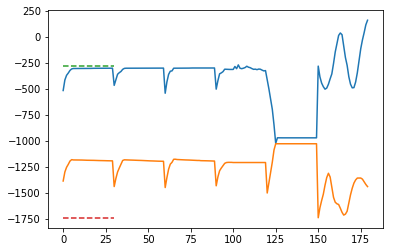

In [251]:
plt.plot(trajectory)
plt.plot([0,30],[hold0, hold0] ,'--')
plt.plot([0,30],[hold1, hold1] ,'--')

In [203]:
print()
print("hold: ", hold0, hold1)

my_drive.axis0.controller.pos_setpoint = hold0
# my_drive.axis1.controller.pos_setpoint = hold1


for _ in range(30):
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    sys.stdout.write("\r\rcpr0: " + str(pos0) + " cpr1:" + str(pos1) + "\t vel_setpoint" + str(my_drive.axis0.controller.vel_setpoint)) 
    time.sleep(0.1)
    
    
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

hold:  1185.741943359375 -2394.087158203125
cpr0: 1037.1826171875 cpr1: -2118.956787109375	 vel_setpoint0.0
hold:  1185.741943359375 -2394.087158203125
cpr0: 1046.5732421875 cpr1:-2154.85546875	 vel_setpoint0.0

In [192]:
set_PID(21, 3e-4, 3e-5)

hold0 = my_drive.axis0.encoder.pos_estimate
hold1 = my_drive.axis1.encoder.pos_estimate

print("hold: ", hold0, hold1)

my_drive.axis0.controller.pos_setpoint = hold0
my_drive.axis1.controller.pos_setpoint = hold1

my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

for _ in range(30):
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    
    sys.stdout.write("\r\rcpr0: " + str(pos0) + " cpr1:" + str(pos1) + "\t vel_setpoint" + str(my_drive.axis0.controller.vel_setpoint)) 
    time.sleep(0.1)

my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

hold:  901.958984375 -2312.85400390625
cpr0: 1035.828125 cpr1:-2119.792724609375	 vel_setpoint0.0

In [173]:
# hold0 = my_drive.axis0.encoder.pos_estimate
# hold1 = my_drive.axis1.encoder.pos_estimate

# my_drive.axis0.controller.pos_setpoint = hold0
# my_drive.axis1.controller.pos_setpoint = hold1

print("\nhold: ", hold0, hold1)

for _ in range(30):
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate

    sys.stdout.write("\r\rcpr0: " + str(pos0) + " cpr1:" + str(pos1)) 
    time.sleep(0.1)
    
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE


hold:  1168.14892578125 -2447.9052734375
cpr0: 107.4240951538086 cpr1:-1175.8602294921875

In [120]:
my_drive.axis0.controller.set_pos_setpoint

In [119]:
my_drive.axis1.motor.config.current_lim

20.0

In [71]:
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

In [174]:
for _ in range(100):
    cpr0 = my_drive.axis0.encoder.count_in_cpr
    cpr1 = my_drive.axis1.encoder.count_in_cpr

    sys.stdout.write("\r\rcpr0: " + str(cpr0) + " cpr1:" + str(cpr1)) 
    time.sleep(0.1)

cpr0: 1012 cpr1:6874

In [3]:
''' Calibrate zeros '''

zero = np.array([0,0])
print("Position motor 1...", )
time.sleep(1)
zero[1] = my_drive.axis0.encoder.count_in_cpr
print("Done", zero[1])
print("Calibrating motor 2... ")
time.sleep(3)
zero[0] = -my_drive.axis1.encoder.count_in_cpr
print("Done", zero[0])

Position motor 1...
Done 1949
Calibrating motor 2... 
Done -8028


In [4]:
import pickle
with open('theta2xy.pkl', 'rb') as f:
    mapping = pickle.load(f)
    
def theta2xy(_t):
    idx = np.sum((mapping['theta'][:,:2] - _t)**2, axis=1).argmin()
    return mapping['xy'][idx]

def xy2pixel(p):
    ''' y^2 = 24in/(ratio^2+1) 
        x^2 = 24in/(1/ratio^2 + 1)'''
    screen = np.array([1920, -1200])
    center = screen/2 + np.array([0, 400])
    scale = screen/np.array([516.94, 323.087])
    
    return p*scale + center

theta2xy(np.array([0,0]))

def getAngles():
    pmpi = lambda t: (t+np.pi) % (2*np.pi) - np.pi
    cpr = np.array([-my_drive.axis1.encoder.count_in_cpr, \
                    my_drive.axis0.encoder.count_in_cpr])
    
    return pmpi((cpr-zero)*2*np.pi/2**13)


for _ in range(10):
    cpr = np.array([-my_drive.axis1.encoder.count_in_cpr, my_drive.axis0.encoder.count_in_cpr]) - zero
    theta = getAngles()
    xy = theta2xy(theta)
    pix = xy2pixel(xy)
    digits = tuple(cpr) + tuple(theta) + tuple(xy) + tuple(pix)
    sys.stdout.write("\rcpr: %.2f, %.2f\tθ: %.2f, %.2f\tmm: %.2f, %.2f\tpix: %.2f, %.2f" % digits)
    try:
        time.sleep(0.1)
    except KeyboardInterrupt:
        break

cpr: 95.00, -128.00	θ: 0.07, -0.10	mm: 0.79, -354.02	pix: 962.93, 1114.90

In [41]:
!cp /Users/ben/gitgit/odrive/lab/01_transformation.ipynb 08_transformation.ipynb

In [5]:
import asyncio
import datetime
import random
import websockets
import numpy as np

_c = np.array([1920/2, 1200/2])
_r = 300
_t = np.linspace(0, 2*np.pi, 512)
circle = _r*np.vstack([np.sin(_t), np.cos(_t)]).T + _c

def arr2str(arr):
    return ",".join(map(str,arr))

In [6]:
async def tick(websocket, path):
    i = 0
    while True:
        now = datetime.datetime.utcnow().isoformat() + 'Z'
        theta = getAngles()
        xy = theta2xy(theta)
        pix = xy2pixel(xy)
        sys.stdout.write("\rcpr: %.2f, %.2f\tθ: %.2f, %.2f\tmm: %.2f, %.2f\tpix: %.2f, %.2f" % digits)

        await websocket.send(arr2str(pix))
        await asyncio.sleep(.005)

start_server = websockets.serve(tick, '127.0.0.1', 5678)

asyncio.get_event_loop().run_until_complete(start_server)

In [ ]:
try:
    asyncio.get_event_loop().run_forever()
except KeyboardInterrupt:
    start_server.ws_server.close()

cpr: 95.00, -128.00	θ: 0.07, -0.10	mm: 0.79, -354.02	pix: 962.93, 1114.90

In [137]:
import threading

In [151]:
start_server = websockets.serve(tick, '127.0.0.1', 5678)
asyncio.get_event_loop().run_until_complete(start_server)


cpr: 194.00, -226.00	θ: 0.15, -0.17	mm: -2.45, -351.22	pix: 950.88, 1104.48

In [152]:
class stream(threading.Thread):
    def __init__(self):
        threading.Thread.__init__(self)
        self.kill = False
        
    def run(self):
        
        try:
            asyncio.get_event_loop().run_forever()
        except KeyboardInterrupt:
            start_server.ws_server.close()

In [154]:
s = stream()
s.start()

Exception in thread Thread-17:
Traceback (most recent call last):
  File "/Users/ben/anaconda3/envs/py37/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "<ipython-input-152-ff769fc173ad>", line 9, in run
    asyncio.get_event_loop().run_forever()
  File "/Users/ben/anaconda3/envs/py37/lib/python3.7/asyncio/events.py", line 644, in get_event_loop
    % threading.current_thread().name)
RuntimeError: There is no current event loop in thread 'Thread-17'.

